# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

This project digs into a large Kaggle dataset of used cars to answer a simple question: what really makes one car sell for more than another?​

Using basic data exploration and modeling, the goal is to spot which features buyers actually pay for.

The outcome is a clear set of insights and practical recommendations that a used car dealership can use to price cars smarter and highlight the features customers value most.

## 1. Business Understanding


#### 1.1 Business objective 
Understand which features have the biggest impact on selling price of used cars, so a used car dealership can price cars more accurately and highlight the attributes.

Success means dealers can:
- Set competitive prices faster and with more confidence.
- Increase profit per car while staying attractive to buyers.
- Use clear, data-backed insights (simple rules) in daily pricing decisions.

#### 1.2 Assess situation

The project uses a public Kaggle dataset of around 400K+ used cars, plus standard data science tools (Python, pandas, scikit-learn, and basic visualization libraries) on a Jupyter notebook.​

There is no live connection to a real dealership system, so all insights are offline and based only on the historical Kaggle data. Legal and privacy risks are low because the data is anonymized and public, but results may not fully reflect every local market or current price trends.​

Key constraints are limited time, and the need to keep outputs easy to understand for non-technical business users, such as used car managers. The main risks are poor data quality, data drift versus today’s market, and building models that are accurate on paper but too complex to be trusted or used in daily pricing.

#### 1.3 Data mining goal

Build and evaluate regression models that predict a car’s selling price from its features, and measure how well these models explain price differences across the dataset.

The analysis also aims to rank the most important features driving price, create simple pricing rules or ranges for key segments, and produce clear visual summaries that connect these technical results back to practical pricing decisions.

#### 1.4 Project plan

Phase 1 – Business understanding (done): 
Clarified main question, what drives used car prices, and how can pricing and inventory choices improve based on those patterns.

Phase 2 – Data understanding: 
Load the Kaggle used car dataset, inspect structure and basic stats, explore key features, and check for obvious issues or biases.

Phase 3 – Data preparation: 
Clean missing and inconsistent values, engineer simple features, encode categoricals, and create training/validation splits for modeling.

Phase 4 – Modeling: 
Train baseline regression models, tune them lightly, and compare performance using held-out data and simple error metrics.

Phase 5 – Evaluation: 
Check whether models meet the data mining goals: reasonable error, stable behavior, and clear feature importance that aligns with business intuition about car value.

Phase 6 – Deployment/reporting: 
Summarize findings in a short, visual report in the GitHub repo, highlight what features matter most for price, and outline simple, actionable pricing guidelines for used car dealers.

## 2. Data Understanding

### 2.1 Collect initial data
For this assignment, the initial data came directly from the provided Kaggle used car dataset (426K rows) bundled with the course materials. 

### 2.2 Describe data

##### Load and first look

In [31]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [32]:
df = pd.read_csv('data/vehicles.csv')
print(f"Number of (records, columns): {df.shape}")  # (426K, ~18 columns)

Number of (records, columns): (426880, 18)


In [33]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [35]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


##### Quick quality checks

In [36]:
# Missing values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [37]:
# Duplicates 
df.duplicated().sum()

np.int64(0)

##### Categorical overview

In [38]:
df['manufacturer'].value_counts().head(10) # Top brands

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

In [39]:
df['fuel'].value_counts()  # Fuel breakdown

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

##### Correlations (numeric features)

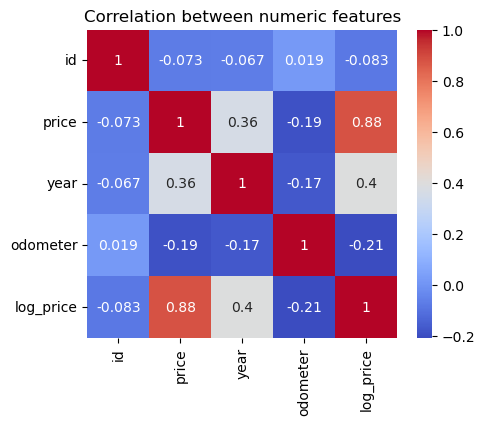

In [50]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()

Key points:

- Price is consistently recorded for all cars, ranging broadly from low to high values with a right-skewed distribution.
- Notable missing data in condition (174K missing), cylinders (177K missing), VIN (161K missing), and size (306K missing), requiring careful handling.
- No duplicate rows present.
- Top car brands are Ford, Chevrolet, Toyota, Honda, Nissan — a typical mix for used car inventories.
- Most cars run on gas, with diesel, hybrid, and electric present but less common.
- Correlations among numeric variables like year and odometer are weak, indicating complex price drivers beyond just age and mileage.


### 2.3 Explore Data

##### Basic distributions

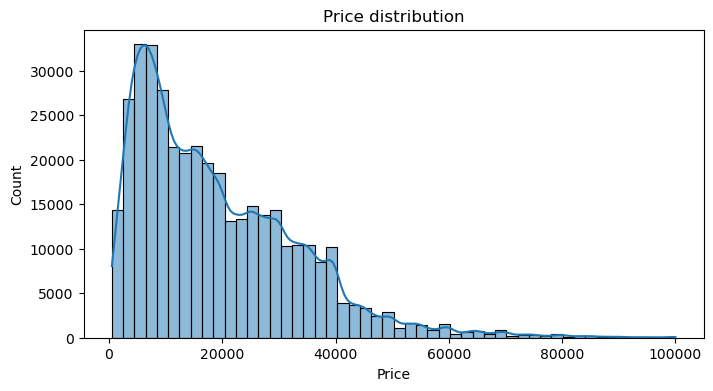

In [41]:
# Focus on reasonable prices only (basic sanity filter, optional)
df = df[df["price"].between(500, 100000)]

# Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Observation: **Strong right skew in raw price**

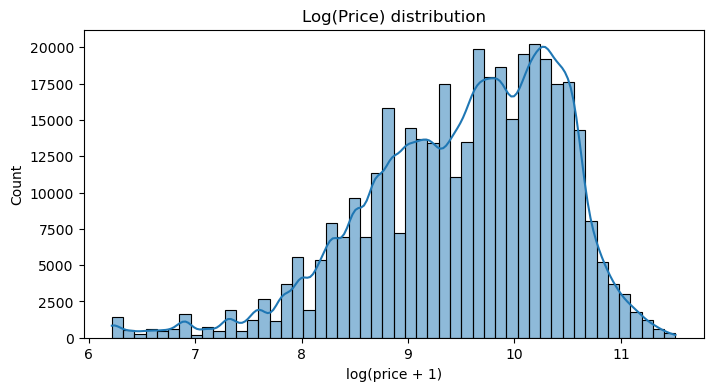

In [42]:
# Log-price distribution (often easier to see patterns)
df["log_price"] = np.log1p(df["price"])
plt.figure(figsize=(8, 4))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.title("Log(Price) distribution")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

Observation: **Log(price) looks more “normal”**

##### Price vs. year and mileage

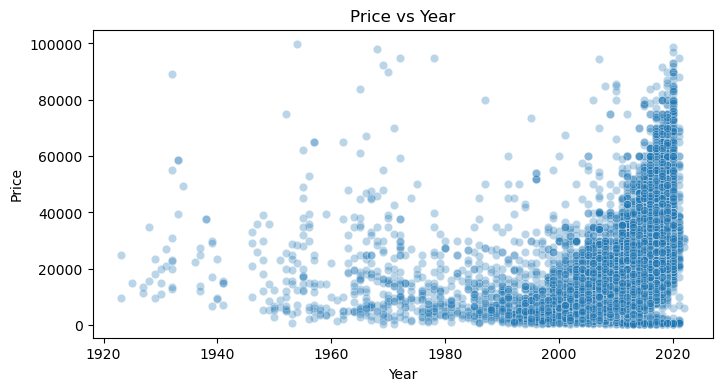

In [44]:
# Scatter: year vs price (sample to keep plot readable)
sample = df.sample(n=20000, random_state=42)

plt.figure(figsize=(8, 4))
sns.scatterplot(data=sample, x="year", y="price", alpha=0.3)
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

Observation: **Newer cars tend to be more expensive**

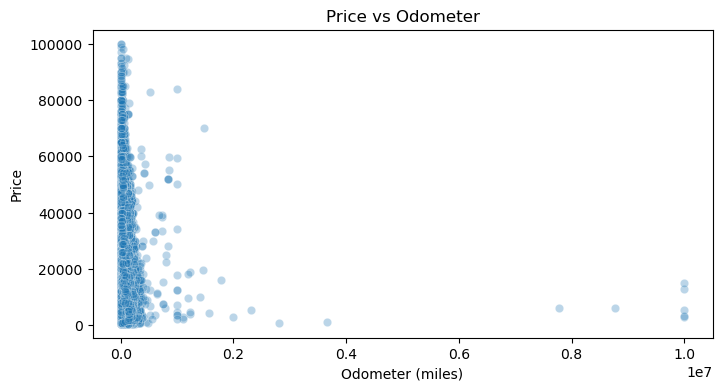

In [45]:
# Scatter: odometer vs price
plt.figure(figsize=(8, 4))
sns.scatterplot(data=sample, x="odometer", y="price", alpha=0.3)
plt.title("Price vs Odometer")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price")
plt.show()

Observation: **Higher miles tends to lower price**

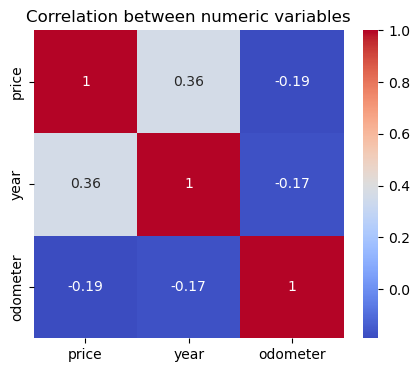

In [51]:
# Correlation heatmap (numeric only)
numeric_cols = ["price", "year", "odometer"]
plt.figure(figsize=(5, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numeric variables")
plt.show()

Observations: 
- Year and Price: Newer cars clearly sell for more (strongest single driver so far).
- Odometer and Price: Higher mileage lowers price (expected, moderate effect).
- Year and Odometer: Older cars naturally have more miles.

##### Price by brand, fuel, and type

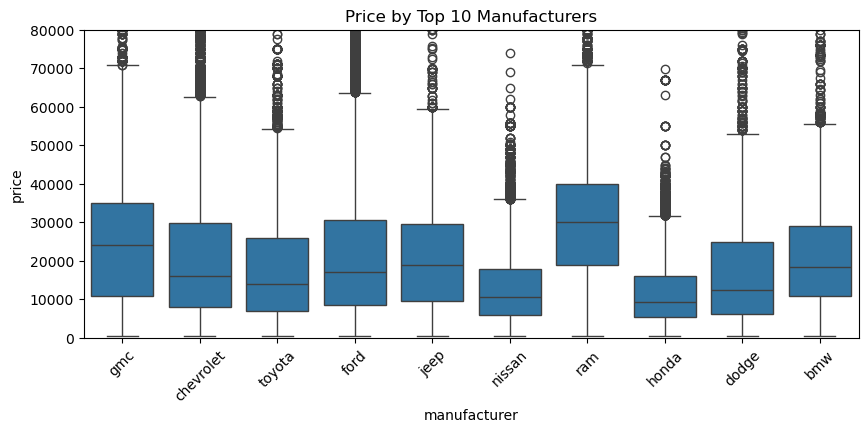

In [54]:
# Price by top manufacturers
top_makes = df["manufacturer"].value_counts().head(10).index
df_top_makes = df[df["manufacturer"].isin(top_makes)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_top_makes, x="manufacturer", y="price")
plt.title("Price by Top 10 Manufacturers")
plt.xticks(rotation=45)
plt.ylim(0, 80000)  # cap to see main body
plt.show()

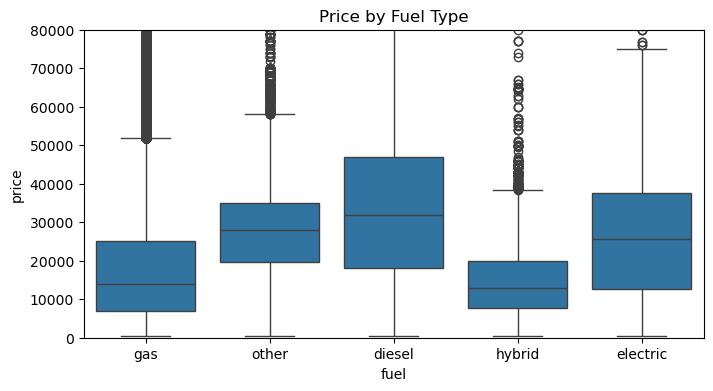

In [56]:
# Price by fuel type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="fuel", y="price")
plt.title("Price by Fuel Type")
plt.ylim(0, 80000)
plt.show()

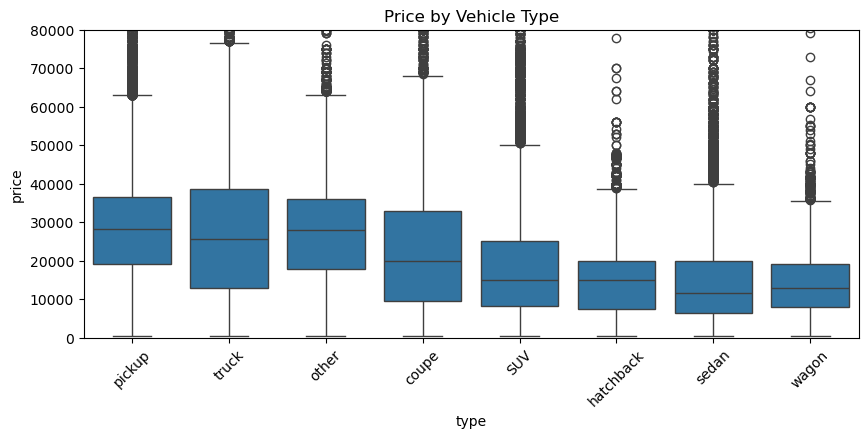

In [57]:
# Price by vehicle type (e.g., SUV, sedan, truck)
top_types = df["type"].value_counts().head(8).index
df_top_types = df[df["type"].isin(top_types)]

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_top_types, x="type", y="price")
plt.title("Price by Vehicle Type")
plt.xticks(rotation=45)
plt.ylim(0, 80000)
plt.show()


##### Price by condition and transmission

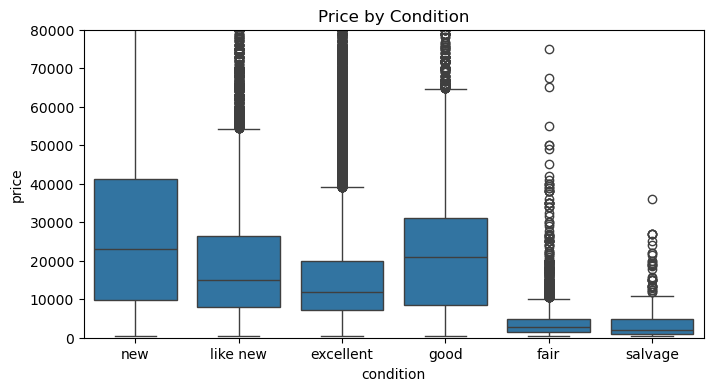

In [59]:
# Drop rows with missing condition/transmission for this view
df_cond = df.dropna(subset=["condition"])
df_trans = df.dropna(subset=["transmission"])

# Price by condition
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_cond, x="condition", y="price",
            order=["new", "like new", "excellent", "good", "fair", "salvage"])
plt.title("Price by Condition")
plt.ylim(0, 80000)
plt.show()

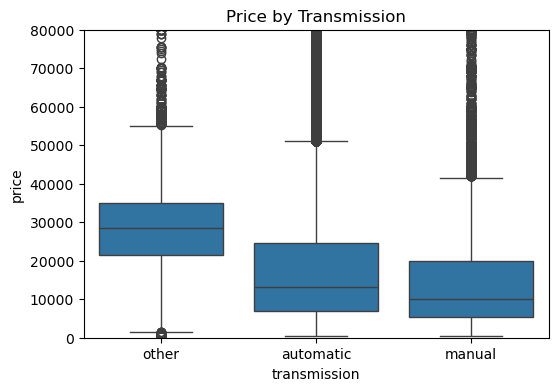

In [60]:
# Price by transmission
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_trans, x="transmission", y="price")
plt.title("Price by Transmission")
plt.ylim(0, 80000)
plt.show()


##### Simple grouped summaries

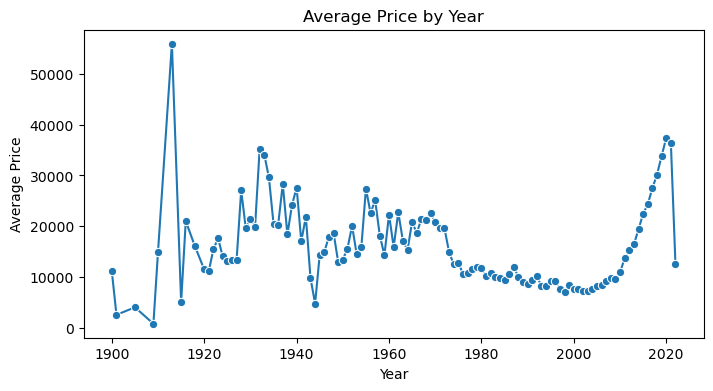

In [61]:
# Average price by year
avg_price_year = (
    df.groupby("year")["price"]
      .mean()
      .reset_index()
      .sort_values("year")
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_price_year, x="year", y="price", marker="o")
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

In [63]:
# Average price by manufacturer (top 10 by count)
avg_price_make = (
    df_top_makes.groupby("manufacturer")["price"]
                .mean()
                .reset_index()
                .sort_values("price", ascending=False)
)

print(avg_price_make)


  manufacturer         price
8          ram  30287.806785
4          gmc  25305.362902
3         ford  21231.322049
0          bmw  20953.825028
6         jeep  20320.721509
1    chevrolet  20208.616404
9       toyota  17431.685388
2        dodge  16652.993500
7       nissan  13185.211871
5        honda  11770.727277


## Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [43]:
# Focus on reasonable prices only (basic sanity filter, optional)
df = df[df["price"].between(500, 100000)]

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.